# Web Scraping on Naukari.com through Python
## Name - Vipul Solanki
## Contribution - Individual
## Github link - https://github.com/vipul-solanki/Web_Scraping_assignment.git

# Problem Statement: Navigating the Data Science Job Landscape

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

LinkedIn Jobs
Indeed
Naukri
Glassdoor
AngelList
🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?

# Let's Go!

In [51]:
!pip install selenium
!pip install BeautifulSoup4

In [6]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.chrome.service import Service

In [3]:
# Creating Column for the Dataset.

df = pd.DataFrame(columns=['Title','Company','Ratings','Reviews','Experience','Salary','Location','Job_Post_History','URL'])
df

,Title,Company,Ratings,Reviews,Experience,Salary,Location,Job_Post_History,URL


In [49]:
# Web Scraping through the website 'naukri.com'
# Looping that for 10 page.

for param in range(1,11):
    
    # Using selenium WebDriver to get HTML code.    
    service = Service()
    options = webdriver.ChromeOptions()
    url = "https://www.naukri.com/data-science-jobs-in-ahmedabad-param?k=data%20science&l=ahmedabad&nignbevent_src=jobsearchDeskGNB"

    driver = webdriver.Chrome(service=service, options=options)
    driver.get(url)

    time.sleep(10)
    # Store the code .     
    soup = BeautifulSoup(driver.page_source,'html.parser')

    #   print(soup.prettify())

    driver.close()
    
    # Extract the Useful code from the soup.    
    results = soup.find_all('div',class_='srp-jobtuple-wrapper')

    for job_elem in results:

        # URL to apply for the job
        anchor_tag = job_elem.find('a', class_='title')
        URL = 'NaN'
        # Check if the anchor tag is found
        if anchor_tag:
            # Get the 'href' attribute
            URL = anchor_tag.get('href')
            print(URL)

        # Post Title
        Title = job_elem.find('a',class_='title').text

        # Company Name
        Company = job_elem.find('a',class_='comp-name').text

        # Ratings
        Ratings = 'NaN'
        rating_span = job_elem.find('span',class_='main-2')
        if rating_span:
            Ratings = rating_span.text

        # Reviews Counts
        Reviews = 'NaN'
        Review_span = job_elem.find('a',class_='review')
        if Review_span:
            Reviews = Review_span.text

        # Years of experience Required
        Experience = 'NaN'
        Exp = job_elem.find('span',class_='expwdth')
        if Exp :
            Experience = Exp.text

        # Salary offered for the job
        Salary = 'NaN'
        Sal = job_elem.find('span',class_='ni-job-tuple-icon ni-job-tuple-icon-srp-rupee sal')
        Sal_span = Sal.find('span')
        if Sal_span:
            Salary = Sal_span.text

        # Location for the job post
        Location = 'NaN'
        Loc = job_elem.find('span',class_='locWdth')
        if Loc:
            Location = Loc.text

        # Number of days since job posted
        Post_History = 'NaN'
        Hist = job_elem.find("div",class_='job-post-day')
        if Hist:
            Post_History = Hist.text

    #   Appending data to the DataFrame
        df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

https://www.naukri.com/job-listings-data-science-intern-genuin-ahmedabad-0-to-3-years-231123501131
https://www.naukri.com/job-listings-data-science-professional-softweb-solutions-ahmedabad-2-to-6-years-110523501751
https://www.naukri.com/job-listings-data-science-lead-beechi-vidya-kendra-trust-hyderabad-secunderabad-ahmedabad-3-to-5-years-020523502651
https://www.naukri.com/job-listings-data-science-team4progress-hyderabad-secunderabad-ahmedabad-8-to-13-years-110923501084
https://www.naukri.com/job-listings-hiring-data-scientist-for-us-based-banking-project-proclink-hyderabad-secunderabad-pune-ahmedabad-3-to-8-years-221123010904
https://www.naukri.com/job-listings-lotus-interworks-data-scientist-lotus-interworks-inc-kolkata-mumbai-hyderabad-secunderabad-pune-chennai-ahmedabad-delhi-ncr-bangalore-bengaluru-1-to-5-years-301123909492
https://www.naukri.com/job-listings-data-scientist-prudent-corporate-advisory-services-ltd-ahmedabad-1-to-5-years-041223500651
https://www.naukri.com/job-lis

C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'URL':URL,'Title':Title,'Company':Company,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)
C:\Users\vsooa\AppData\Local\Temp\ipykernel_14692\4003590005.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [50]:
df.head()

,Title,Company,Ratings,Reviews,Experience,Salary,Location,Job_Post_History,URL
0,Data Science Intern,Genuin,NaN,NaN,0-3 Yrs,Not disclosed,Ahmedabad,NaN,https://www.naukri.com/job-listings-data-scien...
1,Data Science Professional,Softweb Solutions,3.2,9 Reviews,2-6 Yrs,Not disclosed,Ahmedabad,NaN,https://www.naukri.com/job-listings-data-scien...
2,Data Science Lead,Beechi Vidya Kendra Trust,NaN,NaN,3-5 Yrs,Not disclosed,"Ahmedabad, Hyderabad/Secunderabad",NaN,https://www.naukri.com/job-listings-data-scien...
3,Data Science,Team4Progress,NaN,NaN,8-13 Yrs,Not disclosed,"Ahmedabad, Hyderabad/Secunderabad",NaN,https://www.naukri.com/job-listings-data-scien...
4,Hiring Data Scientist - For US based Banking p...,Proclink,NaN,NaN,3-8 Yrs,Not disclosed,"Hybrid - Ahmedabad, Hyderabad/Secunderabad, Pune",NaN,https://www.naukri.com/job-listings-hiring-dat...


In [53]:
# number of rows and columns

df.shape

(200, 9)

In [54]:
# Get info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             200 non-null    object
 1   Company           200 non-null    object
 2   Ratings           200 non-null    object
 3   Reviews           200 non-null    object
 4   Experience        200 non-null    object
 5   Salary            200 non-null    object
 6   Location          200 non-null    object
 7   Job_Post_History  200 non-null    object
 8   URL               200 non-null    object
dtypes: object(9)
memory usage: 14.2+ KB


In [55]:
# Describe the data

df.describe()

,Title,Company,Ratings,Reviews,Experience,Salary,Location,Job_Post_History,URL
count,200,200,200,200,200,200,200,200,200
unique,17,17,10,13,14,3,9,1,20
top,Data Scientist,Recruitment Smart Technologies India Private L...,NaN,NaN,3-5 Yrs,Not disclosed,Ahmedabad,NaN,https://www.naukri.com/job-listings-data-scien...
freq,40,30,40,40,20,180,110,200,10


## DATA Visualization

### There is lot of missing data like salary not disclose, working experience ,etc. We use just sample to get an idea how to do if we get correct data.

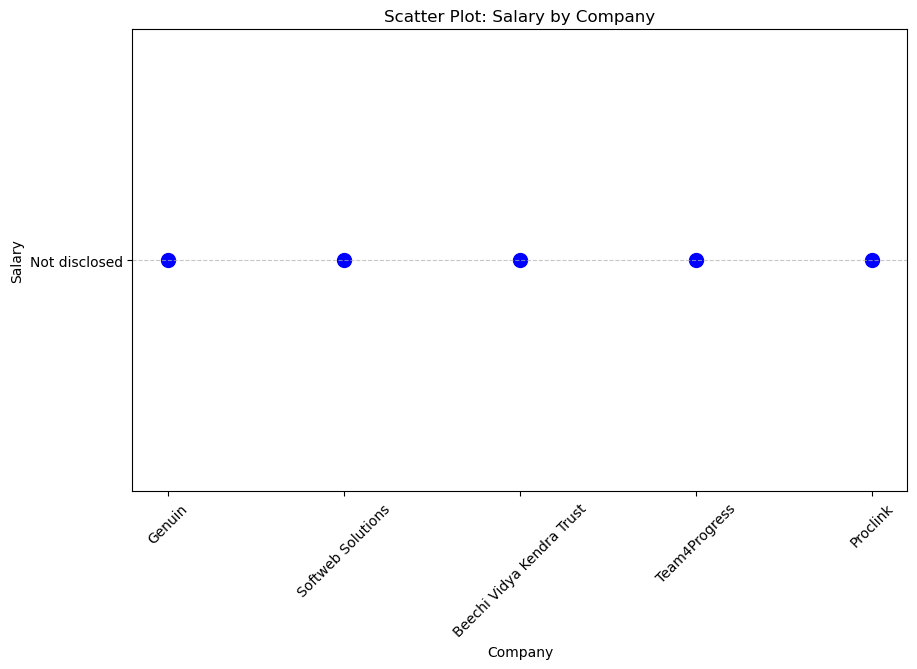

In [66]:
# Plot the graph for company vs salary.

plt.figure(figsize=(10, 6))
plt.scatter(df["Company"].head(), df["Salary"].head(), marker='o', color='b', s=100)
plt.xlabel("Company")
plt.ylabel("Salary")
plt.title("Scatter Plot: Salary by Company")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


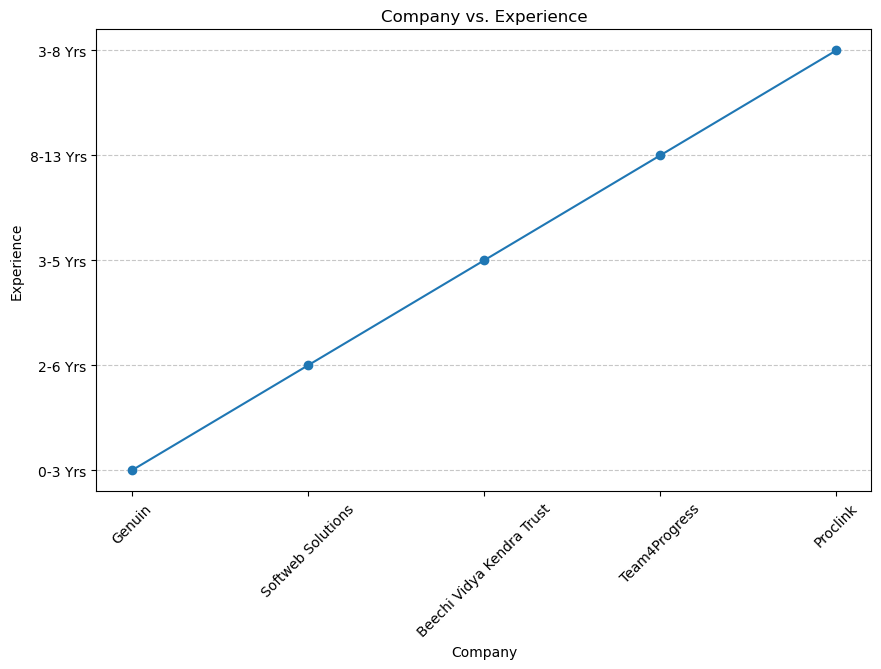

In [67]:
# Ploting the graph between company and work experience

plt.figure(figsize=(10, 6))
plt.plot(df["Company"].head(), df["Experience"].head(), marker='o')
plt.ylabel("Experience")
plt.xlabel("Company")
plt.title("Company vs. Experience")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Conclusion

web scraping is a powerful technique that allows us to extract data from websites efficiently and automate the process of gathering information, especially when dealing with large datasets. In this project, we demonstrated how to scrape multiple pages by running a loop and incrementing the page parameter in the URL, making it possible to collect data from numerous pages seamlessly.

The internet is a vast repository of information, but only a small fraction of this data is readily available in easily consumable formats. When data is too extensive to be manually copied and pasted, web scraping becomes an invaluable tool for data retrieval and analysis. It enables us to access and utilize the wealth of data available online for various purposes, including research, business intelligence, and decision-making.

Web scraping is not only a time-saving technique but also allows for the automation of repetitive tasks, making it an essential skill for data professionals and researchers. However, it is crucial to approach web scraping ethically and responsibly by respecting website terms of service and legal regulations to ensure the integrity and legality of the data extraction process.